# Getting Started with AuctionGym
## Effects of Bid Shading in First-Price Auctions

AuctionGym has several configuration options that detail the type of auction, how bidders behave, and how confounded the contextual information is that bidders observe. To avoid clutter, we define these in configuration files.
For the purposes of this introductory notebook, we will ignore some aspects such as repeated runs.

We parse an existing file, detailing a first-price auction with oracle bidders.
We will look into the effects of bid shading on the auctioneer's revenue, social welfare and surplus.
For this, we repeat simulated experiments with the same set of bidders, changing how their bidding strategy.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [11]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_variance,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

agents2item_values.shape =  {'DR 1': array([1.06087655, 0.89711427, 1.24935151, 1.06176653, 1.01270638,
       1.22625934, 1.00469518, 1.45906526, 1.18564984, 1.0051466 ,
       0.74912232, 0.85082345]), 'DR 2': array([1.3735054 , 1.0940421 , 1.04432943, 1.53518412, 0.85510599,
       0.98301435, 1.00549752, 1.24267642, 0.96782205, 0.97757177,
       0.80169273, 1.27873317]), 'DR 3': array([1.29852353, 1.00473583, 1.14187082, 0.85339802, 1.00565329,
       1.45585039, 1.13558297, 1.75430488, 0.94417991, 1.24117298,
       1.06279139, 1.23758707])}


In [12]:
parse_config('../config/FP_DR_TS.json')

agents2item_values.shape =  {'DR 1': array([1.06087655, 0.89711427, 1.24935151, 1.06176653, 1.01270638,
       1.22625934, 1.00469518, 1.45906526, 1.18564984, 1.0051466 ,
       0.74912232, 0.85082345]), 'DR 2': array([1.3735054 , 1.0940421 , 1.04432943, 1.53518412, 0.85510599,
       0.98301435, 1.00549752, 1.24267642, 0.96782205, 0.97757177,
       0.80169273, 1.27873317]), 'DR 3': array([1.29852353, 1.00473583, 1.14187082, 0.85339802, 1.00565329,
       1.45585039, 1.13558297, 1.75430488, 0.94417991, 1.24117298,
       1.06279139, 1.23758707])}


(Generator(PCG64) at 0x16C8504A0,
 {'random_seed': 0,
  'num_runs': 5,
  'num_iter': 30,
  'rounds_per_iter': 10000,
  'num_participants_per_round': 2,
  'embedding_size': 5,
  'embedding_variance': 1.0,
  'obs_embedding_size': 4,
  'allocation': 'FirstPrice',
  'agents': [{'name': 'DR',
    'num_copies': 3,
    'num_items': 12,
    'allocator': {'type': 'PyTorchLogisticRegressionAllocator',
     'kwargs': {'embedding_size': 4, 'num_items': 12}},
    'bidder': {'type': 'DoublyRobustBidder',
     'kwargs': {'gamma_sigma': 0.02, 'init_gamma': 1.0}}}],
  'output_dir': 'results/FP_DR_TS/'},
 [{'name': 'DR 1',
   'num_copies': 3,
   'num_items': 12,
   'allocator': {'type': 'PyTorchLogisticRegressionAllocator',
    'kwargs': {'embedding_size': 4, 'num_items': 12}},
   'bidder': {'type': 'DoublyRobustBidder',
    'kwargs': {'gamma_sigma': 0.02, 'init_gamma': 1.0}}},
  {'name': 'DR 2',
   'num_copies': 3,
   'num_items': 12,
   'allocator': {'type': 'PyTorchLogisticRegressionAllocator',
    '

In [13]:
def run_repeated_auctions():
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    social_surplus = []
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_variance,
                            obs_embedding_size)

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(num_iter)):

        # Simulate impression opportunities
        for _ in range(rounds_per_iter):
            auction.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        social_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        
        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            agent.update(iteration=i)
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
        
    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue) / rounds_per_iter
    social_welfare = np.array(social_welfare) / rounds_per_iter
    social_surplus = np.array(social_surplus) / rounds_per_iter
    
    return auction_revenue, social_welfare, social_surplus

self.item_values.shape =  (12,)
self.item_values.shape =  (12,)
self.item_values.shape =  (12,)


  0%|          | 0/30 [00:00<?, ?it/s]


 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  43%|████████████████████████████████████████████████                                                                | 7034/16384 [00:01<00:02, 4667.28it/s]
/Users/AndriiRoiko/auction-gym/src/Models.py:43: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3679.)
  P = (1 + torch.exp(1 - X.matmul(self.m[item, :].T))) ** (-1)


Stopping at Epoch 7034



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

AUC predicting P(win):				 0.6673449200278774
Estimated Utility	 Mean Error:			 0.12675749300529268
Estimated Utility	 Mean Absolute Error:	 0.1385047985597364



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Predicted mu Gammas:  tensor(0.9745, grad_fn=<MinBackward1>) tensor(1.0191, grad_fn=<MaxBackward1>) tensor(0.9997, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0389, grad_fn=<MinBackward1>) tensor(0.0752, grad_fn=<MaxBackward1>) tensor(0.0512, grad_fn=<MeanBackward0>)



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4499
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.61452997 0.7945045 0.7046397



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  29%|████████████████████████████████▋                                                                               | 4783/16384 [00:01<00:03, 3251.78it/s]


Stopping at Epoch 4783



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 22755
AUC predicting P(win):				 0.7667866805444246
Estimated Utility	 Mean Error:			 0.7130562326036638
Estimated Utility	 Mean Absolute Error:	 0.7518195279016044



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Predicted mu Gammas:  tensor(0.9968, grad_fn=<MinBackward1>) tensor(1.0029, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0374, grad_fn=<MinBackward1>) tensor(0.1305, grad_fn=<MaxBackward1>) tensor(0.0489, grad_fn=<MeanBackward0>)



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|█▊                                                                                                                | 532/32768 [00:00<00:40, 802.45it/s]


Stopping at Epoch 532
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  38%|██████████████████████████████████████████                                                                      | 6144/16384 [00:01<00:03, 3303.41it/s]


Stopping at Epoch 6144



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 27300
AUC predicting P(win):				 0.8028956716170352
Estimated Utility	 Mean Error:			 0.8353035189485284
Estimated Utility	 Mean Absolute Error:	 0.8559053325399376



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Predicted mu Gammas:  tensor(0.9619, grad_fn=<MinBackward1>) tensor(1.0353, grad_fn=<MaxBackward1>) tensor(0.9988, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0311, grad_fn=<MinBackward1>) tensor(0.1333, grad_fn=<MaxBackward1>) tensor(0.0493, grad_fn=<MeanBackward0>)



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   2%|█▊                                                                                                                | 533/32768 [00:00<00:51, 631.08it/s]


Stopping at Epoch 533
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  16%|██████████████████▏                                                                                             | 2657/16384 [00:00<00:03, 3898.03it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2657
AUC predicting P(win):				 0.67372465128112
Estimated Utility	 Mean Error:			 0.008038914808953312
Estimated Utility	 Mean Absolute Error:	 0.1337809898409414



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 19536
AUC predicting P(win):				 0.7096374599971218
Estimated Utility	 Mean Error:			 0.04760860834014561
Estimated Utility	 Mean Absolute Error:	 0.15449334315454438



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5453
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.51977706 0.70759356 0.6080508



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  19%|█████████████████████▏                                                                                          | 3103/16384 [00:01<00:04, 3078.88it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3103
AUC predicting P(win):				 0.8048052286768116
Estimated Utility	 Mean Error:			 0.21712252095967716
Estimated Utility	 Mean Absolute Error:	 0.3768569880909473



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  49%|█████████████████████████████████████████████████████▉                                                         | 15921/32768 [00:03<00:04

Stopping at Epoch 15921
AUC predicting P(win):				 0.8212753552867984
Estimated Utility	 Mean Error:			 0.2171225416574986
Estimated Utility	 Mean Absolute Error:	 0.37685700878876877



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|█▊                                                                                                                | 517/32768 [00:00<00:41, 769.69it/s]


Stopping at Epoch 517
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  16%|█████████████████▉                                                                                              | 2623/16384 [00:00<00:03, 3913.56it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2623
AUC predicting P(win):				 0.8072116975444699
Estimated Utility	 Mean Error:			 0.12917598220029944
Estimated Utility	 Mean Absolute Error:	 0.23354265484951758



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  54%|██████████████████████

Stopping at Epoch 17613
AUC predicting P(win):				 0.8154589090514671
Estimated Utility	 Mean Error:			 0.12917851227637955
Estimated Utility	 Mean Absolute Error:	 0.23354402383168135



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   2%|█▊                                                                                                                | 519/32768 [00:00<00:38, 837.54it/s]


Stopping at Epoch 519
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4764.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8680085773720227
Estimated Utility	 Mean Error:			 -0.016874617291249023
Estimated Utility	 Mean Absolute Error:	 0.12364966105167022



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  21%|██████████████████████▉                                                                                         | 6727/32768 [00:01<00:06, 4030.71it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6727
AUC predicting P(win):				 0.8664879481788421
Estimated Utility	 Mean Error:			 -0.004892293643394479
Estimated Utility	 Mean Absolute Error:	 0.1231600745873361



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  10%|███████████▎                                                                               

Stopping at Epoch 3282
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.5656402 0.7009872 0.6440445



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3531.22it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7036991340844085
Estimated Utility	 Mean Error:			 0.00783502127472048
Estimated Utility	 Mean Absolute Error:	 0.31324826381008897



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   9%|██████████▏                                                                                                     | 2966/32768 [00:00<00:07, 3729.94it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2966
AUC predicting P(win):				 0.6991580830894204
Estimated Utility	 Mean Error:			 0.00783502127472048
Estimated Utility	 Mean Absolute Error:	 0.31324826381008897



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████▊                                                                                                          | 1976/32768 [00:02<00:37, 821.65it/s]


Stopping at Epoch 1976
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  0.788968 1.0 0.97941977



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:07, 2065.57it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7767319530782465
Estimated Utility	 Mean Error:			 0.0025628094172154645
Estimated Utility	 Mean Absolute Error:	 0.33141612247588914



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|██████████▋                                                                                                     | 3132/32768 [00:00<00:07, 4147.34it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3132
AUC predicting P(win):				 0.7768322229883728
Estimated Utility	 Mean Error:			 0.0025628094172154645
Estimated Utility	 Mean Absolute Error:	 0.33141612247588914



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   2%|█▊                                                                                                                | 514/32768 [00:00<00:38, 844.88it/s]


Stopping at Epoch 514
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 5032.40it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8772666007727558
Estimated Utility	 Mean Error:			 0.007586435369149692
Estimated Utility	 Mean Absolute Error:	 0.12447915447073167



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  11%|████████████▎                                                                                                   | 3616/32768 [00:00<00:07, 3890.15it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3616
AUC predicting P(win):				 0.875845048562723
Estimated Utility	 Mean Error:			 -0.0005385896841723481
Estimated Utility	 Mean Absolute Error:	 0.12146858881447797



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 11150
DR 1 Number of samples:  torch.Size([6749, 2])
DR 1 Predicted Gammas:  0.5701462 0.95065874 0.7790109



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3940.73it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7022329242175525
Estimated Utility	 Mean Error:			 5.541664708153652e-05
Estimated Utility	 Mean Absolute Error:	 0.30331704023112727



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  49%|██████████████████████████████████████████████████████▍                                                        | 16086/32768 [00:03<00:04

Stopping at Epoch 16086
AUC predicting P(win):				 0.7102738524961704
Estimated Utility	 Mean Error:			 0.000572195098808361
Estimated Utility	 Mean Absolute Error:	 0.3033418228276201



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 6915
DR 2 Number of samples:  torch.Size([6602, 2])
DR 2 Predicted Gammas:  0.7644267 1.0 0.9695951



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3324.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7667707633691215
Estimated Utility	 Mean Error:			 -0.004010356473891286
Estimated Utility	 Mean Absolute Error:	 0.35464928251432415



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   8%|████████▉                                                                                                       | 2608/32768 [00:00<00:07, 4082.87it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2608
AUC predicting P(win):				 0.7702266466575997
Estimated Utility	 Mean Error:			 -0.004010356473891286
Estimated Utility	 Mean Absolute Error:	 0.35464928251432415



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|███████████▋                                 

Stopping at Epoch 3407
DR 3 Number of samples:  torch.Size([6649, 2])
DR 3 Predicted Gammas:  0.570122 1.0 0.9173791



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   7%|███████▍                                                                                                        | 1093/16384 [00:00<00:03, 4734.78it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1093
AUC predicting P(win):				 0.8488322178817621
Estimated Utility	 Mean Error:			 0.012842593333549172
Estimated Utility	 Mean Absolute Error:	 0.15464567957209086



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  33%|████████████████████████████████████▉                                                                          | 10911/32768 [00:02<00:05, 3924.82it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose paramet

Stopping at Epoch 10911
AUC predicting P(win):				 0.8550722709940587
Estimated Utility	 Mean Error:			 0.0053844844524150864
Estimated Utility	 Mean Absolute Error:	 0.14768615576566557



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 7169
DR 1 Number of samples:  torch.Size([6722, 2])
DR 1 Predicted Gammas:  0.53977835 1.0 0.80888563



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3904.78it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7052691486378194
Estimated Utility	 Mean Error:			 -0.006166802377812575
Estimated Utility	 Mean Absolute Error:	 0.3079569828351058



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   8%|████████▊                                                                                                       | 2586/32768 [00:00<00:07, 4306.92it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2586
AUC predicting P(win):				 0.7049979475411319
Estimated Utility	 Mean Error:			 -0.0039155677133027025
Estimated Utility	 Mean Absolute Error:	 0.3078724214474194



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|██▍                                                                                                               | 693/32768 [00:00<00:38, 831.58it/s]


Stopping at Epoch 693
DR 2 Number of samples:  torch.Size([6665, 2])
DR 2 Predicted Gammas:  0.7407053 1.0 0.9600194



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3694.08it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7572666846911726
Estimated Utility	 Mean Error:			 0.0065598899875641044
Estimated Utility	 Mean Absolute Error:	 0.3333654910972964



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  19%|█████████████████████▋                                                                                          | 6361/32768 [00:01<00:06, 4046.53it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6361
AUC predicting P(win):				 0.7615551834801765
Estimated Utility	 Mean Error:			 0.010163917105003525
Estimated Utility	 Mean Absolute Error:	 0.3344505283214796



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|███████████▏                                                                               

Stopping at Epoch 3227
DR 3 Number of samples:  torch.Size([6613, 2])
DR 3 Predicted Gammas:  0.7606001 0.85244817 0.80532706



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3729.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8180695054753435
Estimated Utility	 Mean Error:			 -0.001321723269932648
Estimated Utility	 Mean Absolute Error:	 0.15952516142443596



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  16%|█████████████████▊                                                                                              | 5194/32768 [00:01<00:07, 3727.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5194
AUC predicting P(win):				 0.8131143958812862
Estimated Utility	 Mean Error:			 0.0031232173206513524
Estimated Utility	 Mean Absolute Error:	 0.16044174518878304



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5428
DR 1 Number of samples:  torch.Size([6664, 2])
DR 1 Predicted Gammas:  0.5366812 1.0 0.8188725



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3165.21it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7269206255302949
Estimated Utility	 Mean Error:			 -0.006497807932385644
Estimated Utility	 Mean Absolute Error:	 0.34977503249494135



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   9%|██████████▎                                                                                                     | 3015/32768 [00:00<00:07, 3915.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3015
AUC predicting P(win):				 0.7267338629024194
Estimated Utility	 Mean Error:			 -0.0014702326483898602
Estimated Utility	 Mean Absolute Error:	 0.3494290762046579



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4597
DR 2 Number of samples:  torch.Size([6676, 2])
DR 2 Predicted Gammas:  0.7643448 1.0 0.9545883



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4008.52it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7787064407646719
Estimated Utility	 Mean Error:			 -0.012633900316951866
Estimated Utility	 Mean Absolute Error:	 0.2889324812724824



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  11%|███████████▊                                                                                                    | 3461/32768 [00:00<00:07, 3824.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3461
AUC predicting P(win):				 0.7779507666919542
Estimated Utility	 Mean Error:			 -0.005286958387799471
Estimated Utility	 Mean Absolute Error:	 0.29250866995060404



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   7%|████████                                                                                                         | 2350/32768 [00:02<00:37, 801.23it/s]


Stopping at Epoch 2350
DR 3 Number of samples:  torch.Size([6660, 2])
DR 3 Predicted Gammas:  0.6987434 0.8711137 0.7904266



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4556.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8367798638609942
Estimated Utility	 Mean Error:			 0.0017105138840655656
Estimated Utility	 Mean Absolute Error:	 0.15716067852187962



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  13%|██████████████▍                                                                                                 | 4220/32768 [00:01<00:07, 3916.27it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4220
AUC predicting P(win):				 0.8397145054536325
Estimated Utility	 Mean Error:			 0.002749963192829224
Estimated Utility	 Mean Absolute Error:	 0.15669076728967582



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   5%|█████▎                                                                                                           | 1554/32768 [00:02<00:45, 690.99it/s]


Stopping at Epoch 1554
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.57527715 1.0 0.877392



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3461.28it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7392320581449917
Estimated Utility	 Mean Error:			 0.009386313264790403
Estimated Utility	 Mean Absolute Error:	 0.3475932667677191



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   8%|█████████▏                                                                                                      | 2675/32768 [00:00<00:07, 4293.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2675
AUC predicting P(win):				 0.7404988778052972
Estimated Utility	 Mean Error:			 0.011085477785644261
Estimated Utility	 Mean Absolute Error:	 0.34749693321546066



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|██                                                                                                                | 595/32768 [00:00<00:41, 773.18it/s]


Stopping at Epoch 595
DR 2 Number of samples:  torch.Size([6728, 2])
DR 2 Predicted Gammas:  0.77501386 1.0 0.95354944



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3985.60it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7525797190793817
Estimated Utility	 Mean Error:			 -0.0047735645252399575
Estimated Utility	 Mean Absolute Error:	 0.2876869181965835



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|██████████▉                                                                                                     | 3186/32768 [00:00<00:07, 4116.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3186
AUC predicting P(win):				 0.7504962882850632
Estimated Utility	 Mean Error:			 -0.0039037255051998245
Estimated Utility	 Mean Absolute Error:	 0.2886238765679341



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   3%|███▉                                                                                                             | 1142/32768 [00:01<00:39, 810.02it/s]


Stopping at Epoch 1142
DR 3 Number of samples:  torch.Size([6601, 2])
DR 3 Predicted Gammas:  0.7185999 0.88819975 0.81012356



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   7%|███████▎                                                                                                        | 1075/16384 [00:00<00:03, 4430.94it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1075
AUC predicting P(win):				 0.8205769795079962
Estimated Utility	 Mean Error:			 0.00032666838683325164
Estimated Utility	 Mean Absolute Error:	 0.17677545963960634



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  18%|███████████████████▉                                                                                            | 5821/32768 [00:01<00:06, 3850.55it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5821
AUC predicting P(win):				 0.8500160985311618
Estimated Utility	 Mean Error:			 -0.0018795110938555509
Estimated Utility	 Mean Absolute Error:	 0.17531411200999333



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   2%|█▊                                                                                                                | 513/32768 [00:00<00:39, 824.79it/s]


Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6653, 2])
DR 1 Predicted Gammas:  0.5376365 1.0 0.8189276



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3355.98it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7089521056512238
Estimated Utility	 Mean Error:			 0.0031790633555680565
Estimated Utility	 Mean Absolute Error:	 0.3095601494851901



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|███████▊                                                                                                        | 2278/32768 [00:00<00:07, 4303.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2278
AUC predicting P(win):				 0.7079983403566474
Estimated Utility	 Mean Error:			 0.0010677237210511422
Estimated Utility	 Mean Absolute Error:	 0.3093665879622824



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   3%|██▉                                                                                                               | 832/32768 [00:01<00:41, 775.02it/s]


Stopping at Epoch 832
DR 2 Number of samples:  torch.Size([6643, 2])
DR 2 Predicted Gammas:  0.7002068 1.0 0.9373317



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3818.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7513130780335107
Estimated Utility	 Mean Error:			 0.00941847013862943
Estimated Utility	 Mean Absolute Error:	 0.3031512615049062



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   7%|███████▎                                                                                                        | 2137/32768 [00:00<00:07, 4048.15it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2137
AUC predicting P(win):				 0.7519578771685498
Estimated Utility	 Mean Error:			 0.0072370359203549695
Estimated Utility	 Mean Absolute Error:	 0.30204958032874235



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4270
DR 3 Number of samples:  torch.Size([6704, 2])
DR 3 Predicted Gammas:  0.6727861 0.80899245 0.7468347



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4553.04it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8287684955752213
Estimated Utility	 Mean Error:			 -0.012155495640345454
Estimated Utility	 Mean Absolute Error:	 0.17735862254801196



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  12%|████████████▉                                                                                                   | 3771/32768 [00:00<00:07, 3936.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3771
AUC predicting P(win):				 0.8256199241466498
Estimated Utility	 Mean Error:			 -0.003319584620586361
Estimated Utility	 Mean Absolute Error:	 0.18025743119613316



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   5%|█████▌                                                                                                           | 1627/32768 [00:02<00:39, 780.71it/s]


Stopping at Epoch 1627
DR 1 Number of samples:  torch.Size([6635, 2])
DR 1 Predicted Gammas:  0.56200236 1.0 0.8338758



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3390.60it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7019383805806798
Estimated Utility	 Mean Error:			 -0.013369389576273339
Estimated Utility	 Mean Absolute Error:	 0.3391859353376888



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  12%|█████████████                                                                                                   | 3805/32768 [00:00<00:06, 4364.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3805
AUC predicting P(win):				 0.7102056366576498
Estimated Utility	 Mean Error:			 -0.007107885548980469
Estimated Utility	 Mean Absolute Error:	 0.3392913111814245



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  11%|████████████▏         

Stopping at Epoch 3526
DR 2 Number of samples:  torch.Size([6701, 2])
DR 2 Predicted Gammas:  0.67051923 1.0 0.91916317



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3913.46it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7689588774633594
Estimated Utility	 Mean Error:			 -0.009618098368441814
Estimated Utility	 Mean Absolute Error:	 0.27826668910231056



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 2060/32768 [00:00<00:07, 4079.18it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2060
AUC predicting P(win):				 0.7701491168517429
Estimated Utility	 Mean Error:			 0.0007929096517199445
Estimated Utility	 Mean Absolute Error:	 0.2812623179738004



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   5%|█████▊                                                                                                           | 1683/32768 [00:02<00:37, 827.30it/s]


Stopping at Epoch 1683
DR 3 Number of samples:  torch.Size([6664, 2])
DR 3 Predicted Gammas:  0.6258787 0.78319937 0.72297657



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3971.24it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8305689083626563
Estimated Utility	 Mean Error:			 -1.0183831211146497e-05
Estimated Utility	 Mean Absolute Error:	 0.2023936190471577



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████▏                                                                                                         | 1812/32768 [00:00<00:08, 3582.04it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1812
AUC predicting P(win):				 0.8335626836966133
Estimated Utility	 Mean Error:			 0.0009694438068793932
Estimated Utility	 Mean Absolute Error:	 0.20187713024755372



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 7890
DR 1 Number of samples:  torch.Size([6594, 2])
DR 1 Predicted Gammas:  0.61200804 1.0 0.84826714



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3375.24it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7025490486325594
Estimated Utility	 Mean Error:			 0.0033682507481360485
Estimated Utility	 Mean Absolute Error:	 0.348903299407079



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  12%|████████████▉                                                                                                   | 3788/32768 [00:00<00:06, 4241.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3788
AUC predicting P(win):				 0.7061556834002785
Estimated Utility	 Mean Error:			 0.007239777749543807
Estimated Utility	 Mean Absolute Error:	 0.349416930758832



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|████████▍                                                                                                        | 2432/32768 [00:03<00:41, 723.01it/s]


Stopping at Epoch 2432
DR 2 Number of samples:  torch.Size([6732, 2])
DR 2 Predicted Gammas:  0.60885763 1.0 0.8830414



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████▏                                                                                                        | 1048/16384 [00:00<00:03, 4355.93it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1048
AUC predicting P(win):				 0.7660964574312363
Estimated Utility	 Mean Error:			 0.00027526264969019126
Estimated Utility	 Mean Absolute Error:	 0.25569306921493823



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████▏                                                                                                        | 2112/32768 [00:00<00:07, 4000.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2112
AUC predicting P(win):				 0.7650945277280362
Estimated Utility	 Mean Error:			 -0.0005074748366557516
Estimated Utility	 Mean Absolute Error:	 0.2556164408285655



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   4%|████▍                                                                                                            | 1279/32768 [00:01<00:39, 799.38it/s]


Stopping at Epoch 1279
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.642964 0.76466024 0.70624405



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4086.22it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.850351830527246
Estimated Utility	 Mean Error:			 0.0009581064378715988
Estimated Utility	 Mean Absolute Error:	 0.2088450690216216



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   7%|████████▏                                                                                                       | 2409/32768 [00:00<00:07, 3834.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2409
AUC predicting P(win):				 0.8630394581947404
Estimated Utility	 Mean Error:			 0.004666790719193664
Estimated Utility	 Mean Absolute Error:	 0.2087197894929959



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   4%|████▋                                                                                                            | 1359/32768 [00:01<00:40, 780.75it/s]


Stopping at Epoch 1359
DR 1 Number of samples:  torch.Size([6651, 2])
DR 1 Predicted Gammas:  0.58392704 1.0 0.868626



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3329.88it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6550219457254174
Estimated Utility	 Mean Error:			 0.006660893007699885
Estimated Utility	 Mean Absolute Error:	 0.3230381846920908



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   8%|█████████▌                                                                                                      | 2782/32768 [00:00<00:07, 4198.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2782
AUC predicting P(win):				 0.6448357454295852
Estimated Utility	 Mean Error:			 0.007842701769848049
Estimated Utility	 Mean Absolute Error:	 0.3242432431559864



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   3%|██▊                                                                                                               | 820/32768 [00:00<00:37, 847.83it/s]


Stopping at Epoch 820
DR 2 Number of samples:  torch.Size([6604, 2])
DR 2 Predicted Gammas:  0.6680002 1.0 0.92656744



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4295.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7805444066348464
Estimated Utility	 Mean Error:			 -0.016237522831157505
Estimated Utility	 Mean Absolute Error:	 0.24939046150519115



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████▏                                                                                                        | 2086/32768 [00:00<00:07, 3866.11it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2086
AUC predicting P(win):				 0.7815410955432319
Estimated Utility	 Mean Error:			 -0.009736215690625582
Estimated Utility	 Mean Absolute Error:	 0.25182310839152394



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   2%|██                                                                                                                | 601/32768 [00:00<00:46, 696.73it/s]


Stopping at Epoch 601
DR 3 Number of samples:  torch.Size([6745, 2])
DR 3 Predicted Gammas:  0.6238241 0.76752806 0.69314873



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:10, 1483.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8384040042089697
Estimated Utility	 Mean Error:			 0.008872970338840226
Estimated Utility	 Mean Absolute Error:	 0.20443422135413067



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████▏                                                                                                        | 2121/32768 [00:01<00:19, 1593.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2121
AUC predicting P(win):				 0.838874785950023
Estimated Utility	 Mean Error:			 0.003917768150322936
Estimated Utility	 Mean Absolute Error:	 0.2032041313312623



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4720
DR 1 Number of samples:  torch.Size([6652, 2])
DR 1 Predicted Gammas:  0.55627936 0.9729522 0.8155057



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3745.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7022578987745582
Estimated Utility	 Mean Error:			 -0.0022728393791189697
Estimated Utility	 Mean Absolute Error:	 0.32515027537874575



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|████████▏                                                                                                       | 2398/32768 [00:00<00:07, 3840.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2398
AUC predicting P(win):				 0.7082442474956363
Estimated Utility	 Mean Error:			 -0.004944011490576689
Estimated Utility	 Mean Absolute Error:	 0.3244055627222066



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 13807
DR 2 Number of samples:  torch.Size([6708, 2])
DR 2 Predicted Gammas:  0.63864106 1.0 0.93084395



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3967.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7506608205122858
Estimated Utility	 Mean Error:			 0.005951272730320006
Estimated Utility	 Mean Absolute Error:	 0.2555659396603058



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████▎                                                                                                         | 1831/32768 [00:00<00:08, 3865.49it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1831
AUC predicting P(win):				 0.7503497439266207
Estimated Utility	 Mean Error:			 0.007671198662465187
Estimated Utility	 Mean Absolute Error:	 0.25893287220907596



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   2%|██▋                                                                                                               | 759/32768 [00:00<00:40, 785.37it/s]


Stopping at Epoch 759
DR 3 Number of samples:  torch.Size([6640, 2])
DR 3 Predicted Gammas:  0.5988124 0.77019644 0.67740154



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4252.14it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8004378516536298
Estimated Utility	 Mean Error:			 0.0030705556762113755
Estimated Utility	 Mean Absolute Error:	 0.19454790844471162



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  18%|███████████████████▋                                                                                            | 5743/32768 [00:01<00:07, 3382.12it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5743
AUC predicting P(win):				 0.7981569633136636
Estimated Utility	 Mean Error:			 0.00322849210233243
Estimated Utility	 Mean Absolute Error:	 0.19648750045176122



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4655
DR 1 Number of samples:  torch.Size([6684, 2])
DR 1 Predicted Gammas:  0.5928135 0.9507515 0.8139205



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3538.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7115475795738462
Estimated Utility	 Mean Error:			 0.007505304392953939
Estimated Utility	 Mean Absolute Error:	 0.3536330692232893



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  10%|███████████▌                                                                                                    | 3365/32768 [00:00<00:06, 4238.98it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3365
AUC predicting P(win):				 0.7134710585840068
Estimated Utility	 Mean Error:			 0.009539649709671305
Estimated Utility	 Mean Absolute Error:	 0.3541966758403354



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 17520
DR 2 Number of samples:  torch.Size([6657, 2])
DR 2 Predicted Gammas:  0.0 1.0 0.86651736



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:08, 1805.22it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.783739618056168
Estimated Utility	 Mean Error:			 -0.00278012990332627
Estimated Utility	 Mean Absolute Error:	 0.239841028020484



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   5%|█████▏                                                                                                          | 1505/32768 [00:00<00:08, 3665.97it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1505
AUC predicting P(win):				 0.7832282829797116
Estimated Utility	 Mean Error:			 -0.0014584533617211508
Estimated Utility	 Mean Absolute Error:	 0.2415348758508234



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   5%|█████▉                                                                                                           | 1706/32768 [00:02<00:42, 728.73it/s]


Stopping at Epoch 1706
DR 3 Number of samples:  torch.Size([6659, 2])
DR 3 Predicted Gammas:  0.6324851 0.7128702 0.67427087



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3931.52it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8684270147238844
Estimated Utility	 Mean Error:			 -0.011777486811989498
Estimated Utility	 Mean Absolute Error:	 0.20939699405486684



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   9%|██████████▏                                                                                                     | 2966/32768 [00:00<00:08, 3677.13it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2966
AUC predicting P(win):				 0.8734893273270689
Estimated Utility	 Mean Error:			 -0.00446443084608101
Estimated Utility	 Mean Absolute Error:	 0.20959841126013334



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   3%|███▍                                                                                                              | 973/32768 [00:01<00:51, 622.98it/s]


Stopping at Epoch 973
DR 1 Number of samples:  torch.Size([6683, 2])
DR 1 Predicted Gammas:  0.45165664 0.9894269 0.7985818



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:05, 2786.74it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.661424308434638
Estimated Utility	 Mean Error:			 -0.0209045831252567
Estimated Utility	 Mean Absolute Error:	 0.31629989567983047



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 21867
AUC predicting P(win):				 0.6712885484739888
Estimated Utility	 Mean Error:			 -0.01580956917641973
Estimated Utility	 Mean Absolute Error:	 0.31909850012202023



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 6957
DR 2 Number of samples:  torch.Size([6665, 2])
DR 2 Predicted Gammas:  0.6449132 0.9468499 0.83384985



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4070.96it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7447272620969891
Estimated Utility	 Mean Error:			 -0.007455137392718251
Estimated Utility	 Mean Absolute Error:	 0.2724871231479432



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   8%|█████████▏                                                                                                      | 2689/32768 [00:00<00:07, 4047.30it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2689
AUC predicting P(win):				 0.7577772063863223
Estimated Utility	 Mean Error:			 0.001789075896115694
Estimated Utility	 Mean Absolute Error:	 0.2749264154414652



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   3%|███▌                                                                                                             | 1036/32768 [00:01<00:39, 800.78it/s]


Stopping at Epoch 1036
DR 3 Number of samples:  torch.Size([6652, 2])
DR 3 Predicted Gammas:  0.57298005 0.73017395 0.6572777



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4161.34it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7816075070690761
Estimated Utility	 Mean Error:			 0.0076023534107792
Estimated Utility	 Mean Absolute Error:	 0.21724414614393922



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   8%|████████▊                                                                                                       | 2594/32768 [00:00<00:08, 3668.11it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2594
AUC predicting P(win):				 0.7801414891381571
Estimated Utility	 Mean Error:			 0.008343778574630149
Estimated Utility	 Mean Absolute Error:	 0.21750092951620986



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 3272
DR 1 Number of samples:  torch.Size([6623, 2])
DR 1 Predicted Gammas:  0.38087517 1.0 0.79159033



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3171.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7109331911282909
Estimated Utility	 Mean Error:			 0.0027191213849562675
Estimated Utility	 Mean Absolute Error:	 0.34640563335335917



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  19%|██████████████████████████████                                                                                                                                  | 6157/32768 [00:01<00:06, 3944.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6157
AUC predicting P(win):				 0.7255353312748958
Estimated Utility	 Mean Error:			 0.014197174719040712
Estimated Utility	 Mean Absolute Error:	 0.34908201850145626



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|███▋                                                                                                                                                              | 741/32768 [00:01<01:04, 497.99it/s]


Stopping at Epoch 741
DR 2 Number of samples:  torch.Size([6709, 2])
DR 2 Predicted Gammas:  0.6550904 1.0 0.8851906



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3810.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7871760404836236
Estimated Utility	 Mean Error:			 -0.005590968904556743
Estimated Utility	 Mean Absolute Error:	 0.2607798325795341



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   8%|█████████████▍                                                                                                                                                  | 2762/32768 [00:00<00:07, 4047.61it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2762
AUC predicting P(win):				 0.7981817026311795
Estimated Utility	 Mean Error:			 -0.0009866512354412557
Estimated Utility	 Mean Absolute Error:	 0.2584927578893589



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   9%|██████████████▋                                                                                                                          

Stopping at Epoch 2986
DR 3 Number of samples:  torch.Size([6668, 2])
DR 3 Predicted Gammas:  0.59252036 0.7951918 0.69600934



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:07, 2148.63it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7286636392282625
Estimated Utility	 Mean Error:			 0.005449137234540548
Estimated Utility	 Mean Absolute Error:	 0.20067226196112356



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|████████▉                                                                                                                                                       | 1826/32768 [00:00<00:08, 3488.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1826
AUC predicting P(win):				 0.7388756596345535
Estimated Utility	 Mean Error:			 0.0038716805662073785
Estimated Utility	 Mean Absolute Error:	 0.199694554584837



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   4%|██████                                                                                                                                                           | 1235/32768 [00:01<00:45, 694.63it/s]


Stopping at Epoch 1235
DR 1 Number of samples:  torch.Size([6646, 2])
DR 1 Predicted Gammas:  0.4593222 1.0 0.82282144



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3301.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7313989387760355
Estimated Utility	 Mean Error:			 -0.0016890864627244723
Estimated Utility	 Mean Absolute Error:	 0.35380306987116167



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  16%|█████████████████████████▏                                                                                                                                      | 5154/32768 [00:01<00:06, 4094.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5154
AUC predicting P(win):				 0.742111618571307
Estimated Utility	 Mean Error:			 -0.003413654109122385
Estimated Utility	 Mean Absolute Error:	 0.35279090524662454



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   4%|█████▋                                                                                                                                                           | 1157/32768 [00:01<00:51, 612.90it/s]


Stopping at Epoch 1157
DR 2 Number of samples:  torch.Size([6690, 2])
DR 2 Predicted Gammas:  0.49112403 0.98382854 0.7787905



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3343.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7938463089206897
Estimated Utility	 Mean Error:			 -0.0003637140150819239
Estimated Utility	 Mean Absolute Error:	 0.27269014104287714



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   7%|███████████▍                                                                                                                                                    | 2340/32768 [00:00<00:08, 3591.40it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2340
AUC predicting P(win):				 0.8018419019691735
Estimated Utility	 Mean Error:			 -0.0063119979734848316
Estimated Utility	 Mean Absolute Error:	 0.2688100980079208



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   7%|███████████▋                                                                                                                                                     | 2379/32768 [00:03<00:44, 675.60it/s]


Stopping at Epoch 2379
DR 3 Number of samples:  torch.Size([6664, 2])
DR 3 Predicted Gammas:  0.5906691 0.7637133 0.67552334



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3869.23it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8075474879069657
Estimated Utility	 Mean Error:			 0.0024450158971127357
Estimated Utility	 Mean Absolute Error:	 0.21876171813101639



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   9%|█████████████▋                                                                                                                                                  | 2799/32768 [00:00<00:07, 3746.86it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2799
AUC predicting P(win):				 0.8294670754669907
Estimated Utility	 Mean Error:			 0.007709367238883008
Estimated Utility	 Mean Absolute Error:	 0.21856210896343425



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5193
DR 1 Number of samples:  torch.Size([6676, 2])
DR 1 Predicted Gammas:  0.496358 1.0 0.8444754



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3447.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6343045554190851
Estimated Utility	 Mean Error:			 0.00878147788290012
Estimated Utility	 Mean Absolute Error:	 0.30956158101003695



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  13%|████████████████████▎                                                                                                                                           | 4152/32768 [00:01<00:07, 4019.30it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4152
AUC predicting P(win):				 0.6338429293945871
Estimated Utility	 Mean Error:			 0.014675697464889849
Estimated Utility	 Mean Absolute Error:	 0.31339550791736986



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 7048
DR 2 Number of samples:  torch.Size([6676, 2])
DR 2 Predicted Gammas:  0.54874086 0.978434 0.8083006



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3989.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8277341093076083
Estimated Utility	 Mean Error:			 -0.008529650166707151
Estimated Utility	 Mean Absolute Error:	 0.2792157495165087



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|█████████▊                                                                                                                                                      | 2014/32768 [00:00<00:08, 3685.24it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2014
AUC predicting P(win):				 0.8285282625580009
Estimated Utility	 Mean Error:			 0.0016593944974476562
Estimated Utility	 Mean Absolute Error:	 0.2825422941418347



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|████████████████▊                            

Stopping at Epoch 3415
DR 3 Number of samples:  torch.Size([6648, 2])
DR 3 Predicted Gammas:  0.48659092 0.8070864 0.6406273



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4103.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8607846690660388
Estimated Utility	 Mean Error:			 -0.007863333227921314
Estimated Utility	 Mean Absolute Error:	 0.23007790276703083



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  14%|██████████████████████                                                                                                                                          | 4507/32768 [00:01<00:07, 3850.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4507
AUC predicting P(win):				 0.8598013832670872
Estimated Utility	 Mean Error:			 -0.005773900150993785
Estimated Utility	 Mean Absolute Error:	 0.22942628259086775



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4640
DR 1 Number of samples:  torch.Size([6611, 2])
DR 1 Predicted Gammas:  0.44695997 1.0 0.8421987



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3570.36it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6276759864309817
Estimated Utility	 Mean Error:			 -0.0015143456131282047
Estimated Utility	 Mean Absolute Error:	 0.3196282041142009



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|███████████▍                                                                                                                                                    | 2349/32768 [00:00<00:07, 3984.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2349
AUC predicting P(win):				 0.6432435444416192
Estimated Utility	 Mean Error:			 -0.002591265089231748
Estimated Utility	 Mean Absolute Error:	 0.3186664516883136



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 6760
DR 2 Number of samples:  torch.Size([6776, 2])
DR 2 Predicted Gammas:  0.5373567 1.0 0.81909937



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4145.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7589585000244556
Estimated Utility	 Mean Error:			 0.0024667364983237453
Estimated Utility	 Mean Absolute Error:	 0.27742114922677447



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|█████████▋                                                                                                                                                      | 1982/32768 [00:00<00:07, 4009.10it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1982
AUC predicting P(win):				 0.7579127179904595
Estimated Utility	 Mean Error:			 0.005871221422245649
Estimated Utility	 Mean Absolute Error:	 0.27915433523030103



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   4%|██████▌                                                                                                                                                          | 1333/32768 [00:01<00:42, 734.12it/s]


Stopping at Epoch 1333
DR 3 Number of samples:  torch.Size([6613, 2])
DR 3 Predicted Gammas:  0.54908967 0.81159115 0.694264



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4061.10it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8054850160112874
Estimated Utility	 Mean Error:			 0.0136507927767956
Estimated Utility	 Mean Absolute Error:	 0.23391209634277835



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   9%|█████████████▋                                                                                                                                                  | 2813/32768 [00:00<00:09, 3187.61it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2813
AUC predicting P(win):				 0.7981011311738844
Estimated Utility	 Mean Error:			 0.00788564816698902
Estimated Utility	 Mean Absolute Error:	 0.23335706939091147



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   3%|█████▌                                                                                                                                                           | 1140/32768 [00:01<00:42, 752.00it/s]


Stopping at Epoch 1140
DR 1 Number of samples:  torch.Size([6575, 2])
DR 1 Predicted Gammas:  0.50349844 1.0 0.85534173



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:07, 2162.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6882238945444712
Estimated Utility	 Mean Error:			 -0.0006908529948829016
Estimated Utility	 Mean Absolute Error:	 0.3200254408578318



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|██████████▉                                                                                                                                                     | 2228/32768 [00:01<00:21, 1424.27it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2228
AUC predicting P(win):				 0.6895418342260139
Estimated Utility	 Mean Error:			 -0.0005413426881866513
Estimated Utility	 Mean Absolute Error:	 0.31938710628383604



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|██▌                                                                                                                                                               | 514/32768 [00:00<00:51, 625.54it/s]


Stopping at Epoch 514
DR 2 Number of samples:  torch.Size([6732, 2])
DR 2 Predicted Gammas:  0.461451 0.9812129 0.7507524



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3281.40it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7944868171622399
Estimated Utility	 Mean Error:			 0.007082588649938223
Estimated Utility	 Mean Absolute Error:	 0.2761899035772143



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|████████████████                                                                                                                                                | 3281/32768 [00:00<00:07, 3742.87it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3281
AUC predicting P(win):				 0.7963734437188793
Estimated Utility	 Mean Error:			 -0.003887241014220312
Estimated Utility	 Mean Absolute Error:	 0.27055643201644974



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4294
DR 3 Number of samples:  torch.Size([6693, 2])
DR 3 Predicted Gammas:  0.5070797 0.82074195 0.6760522



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3617.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8727501425111887
Estimated Utility	 Mean Error:			 -0.002343484587995407
Estimated Utility	 Mean Absolute Error:	 0.23008263747022883



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  21%|██████████████████████████████████▍                                                                                                                             | 7040/32768 [00:01<00:06, 3736.34it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 7040
AUC predicting P(win):				 0.8805168185254623
Estimated Utility	 Mean Error:			 0.002441114228790616
Estimated Utility	 Mean Absolute Error:	 0.22952172054066933



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   4%|██████▍                                                                                                                                                          | 1307/32768 [00:01<00:44, 704.08it/s]


Stopping at Epoch 1307
DR 1 Number of samples:  torch.Size([6607, 2])
DR 1 Predicted Gammas:  0.44258952 1.0 0.83459485



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3712.55it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6361734591841837
Estimated Utility	 Mean Error:			 0.0003780174820682866
Estimated Utility	 Mean Absolute Error:	 0.28775230238158783



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   8%|████████████▌                                                                                                                                                   | 2561/32768 [00:00<00:08, 3705.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2561
AUC predicting P(win):				 0.6189938717349847
Estimated Utility	 Mean Error:			 0.002152828131925749
Estimated Utility	 Mean Absolute Error:	 0.29004223857824524



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   9%|██████████████▍                                                                            

Stopping at Epoch 2936
DR 2 Number of samples:  torch.Size([6694, 2])
DR 2 Predicted Gammas:  0.489507 0.97043806 0.73142576



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3595.36it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7772715708626203
Estimated Utility	 Mean Error:			 -0.008345918171743218
Estimated Utility	 Mean Absolute Error:	 0.29637780015766574



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████▏                                                                                                                                                     | 2079/32768 [00:00<00:08, 3735.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2079
AUC predicting P(win):				 0.7777725804695074
Estimated Utility	 Mean Error:			 0.00013343694085442195
Estimated Utility	 Mean Absolute Error:	 0.2988509828325341



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   3%|████▌                                                                                                                                                             | 914/32768 [00:01<00:43, 724.84it/s]


Stopping at Epoch 914
DR 3 Number of samples:  torch.Size([6699, 2])
DR 3 Predicted Gammas:  0.4727523 0.80249715 0.658378



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3961.83it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8599864078232777
Estimated Utility	 Mean Error:			 0.0011749113904703816
Estimated Utility	 Mean Absolute Error:	 0.23654358401955436



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   5%|████████▋                                                                                                                                                       | 1778/32768 [00:00<00:09, 3311.55it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1778
AUC predicting P(win):				 0.8583426010751347
Estimated Utility	 Mean Error:			 0.003927864783192569
Estimated Utility	 Mean Absolute Error:	 0.2373004425224223



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 8746
DR 1 Number of samples:  torch.Size([6606, 2])
DR 1 Predicted Gammas:  0.446943 1.0 0.84389687



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3285.47it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6333862374384224
Estimated Utility	 Mean Error:			 -0.002294002521514398
Estimated Utility	 Mean Absolute Error:	 0.2822340463063698



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|███████████▉                                                                                                                                                    | 2450/32768 [00:00<00:07, 3911.43it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2450
AUC predicting P(win):				 0.6360218749291859
Estimated Utility	 Mean Error:			 0.005396298893080596
Estimated Utility	 Mean Absolute Error:	 0.2850288466901053



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   7%|███████████▉                                                                                                                                                     | 2421/32768 [00:03<00:41, 736.41it/s]


Stopping at Epoch 2421
DR 2 Number of samples:  torch.Size([6714, 2])
DR 2 Predicted Gammas:  0.4532235 0.92533994 0.70472467



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3687.70it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7565404692713378
Estimated Utility	 Mean Error:			 -0.008292640755495836
Estimated Utility	 Mean Absolute Error:	 0.29503759741138125



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|█████████▎                                                                                                                                                      | 1914/32768 [00:00<00:08, 3449.62it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1914
AUC predicting P(win):				 0.7545303698920103
Estimated Utility	 Mean Error:			 -0.0016810279103314442
Estimated Utility	 Mean Absolute Error:	 0.29788899710369565



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|███████████████▍                             

Stopping at Epoch 3142
DR 3 Number of samples:  torch.Size([6680, 2])
DR 3 Predicted Gammas:  0.5089252 0.84212315 0.6957784



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3295.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8613551188094831
Estimated Utility	 Mean Error:			 0.004877934479509137
Estimated Utility	 Mean Absolute Error:	 0.2352316450460522



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   7%|███████████▎                                                                                                                                                    | 2322/32768 [00:00<00:08, 3682.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2322
AUC predicting P(win):				 0.8623464088050877
Estimated Utility	 Mean Error:			 0.00582301675445921
Estimated Utility	 Mean Absolute Error:	 0.23503498501479117



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   4%|██████▊                                                                                                                                                          | 1390/32768 [00:02<01:04, 483.89it/s]


Stopping at Epoch 1390
DR 1 Number of samples:  torch.Size([6679, 2])
DR 1 Predicted Gammas:  0.47791013 1.0 0.87927514



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3308.75it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6155020296087393
Estimated Utility	 Mean Error:			 0.0016787434880653027
Estimated Utility	 Mean Absolute Error:	 0.2579370122084811



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   9%|██████████████                                                                                                                                                  | 2871/32768 [00:00<00:08, 3629.53it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2871
AUC predicting P(win):				 0.6030414625806704
Estimated Utility	 Mean Error:			 -0.004941761923473209
Estimated Utility	 Mean Absolute Error:	 0.25618725105670465



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   5%|███████▋                                                                                                                                                         | 1557/32768 [00:02<00:41, 748.50it/s]


Stopping at Epoch 1557
DR 2 Number of samples:  torch.Size([6597, 2])
DR 2 Predicted Gammas:  0.42747232 0.8902029 0.69937193



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3249.55it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.77993899155028
Estimated Utility	 Mean Error:			 0.0006486994454297675
Estimated Utility	 Mean Absolute Error:	 0.3201147981215372



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|████████████████▍                                                                                                                                               | 3379/32768 [00:00<00:07, 3713.49it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3379
AUC predicting P(win):				 0.7850292288891306
Estimated Utility	 Mean Error:			 -0.0010529200221508046
Estimated Utility	 Mean Absolute Error:	 0.3172455868042953



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 7586
DR 3 Number of samples:  torch.Size([6724, 2])
DR 3 Predicted Gammas:  0.5372358 1.0 0.70958114



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3495.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8893357199218681
Estimated Utility	 Mean Error:			 -0.00035992477613565734
Estimated Utility	 Mean Absolute Error:	 0.24362727114861255



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  26%|█████████████████████████████████████████▋                                                                                                                      | 8531/32768 [00:02<00:06, 3608.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 8531
AUC predicting P(win):				 0.8900616962557979
Estimated Utility	 Mean Error:			 -0.0022933951026989255
Estimated Utility	 Mean Absolute Error:	 0.24322361736114842



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   2%|██▊                                                                                                                                                               | 567/32768 [00:00<00:42, 760.80it/s]


Stopping at Epoch 567
DR 1 Number of samples:  torch.Size([6660, 2])
DR 1 Predicted Gammas:  0.40705216 1.0 0.8315757



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4273.07it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.5932176356958536
Estimated Utility	 Mean Error:			 -0.006329596170234192
Estimated Utility	 Mean Absolute Error:	 0.2578026685600633



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   5%|████████▌                                                                                                                                                       | 1762/32768 [00:00<00:07, 4170.46it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1762
AUC predicting P(win):				 0.5933754343586886
Estimated Utility	 Mean Error:			 -0.0053342587109458505
Estimated Utility	 Mean Absolute Error:	 0.25844434964625007



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4863
DR 2 Number of samples:  torch.Size([6666, 2])
DR 2 Predicted Gammas:  0.38992763 0.94578624 0.6957662



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3342.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7960584374800521
Estimated Utility	 Mean Error:			 0.007551970762825041
Estimated Utility	 Mean Absolute Error:	 0.30604593635532573



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   8%|████████████▉                                                                                                                                                   | 2654/32768 [00:00<00:07, 3843.16it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2654
AUC predicting P(win):				 0.7983952066404015
Estimated Utility	 Mean Error:			 0.003770404465011515
Estimated Utility	 Mean Absolute Error:	 0.3037979653754444



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   9%|██████████████▋                                                                                                   

Stopping at Epoch 3002
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.5731789 0.9867163 0.7060559



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3665.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8597108063571478
Estimated Utility	 Mean Error:			 -0.0057887487554765015
Estimated Utility	 Mean Absolute Error:	 0.23394838811678198



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   5%|████████▍                                                                                                                                                       | 1726/32768 [00:00<00:08, 3671.15it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1726
AUC predicting P(win):				 0.8592282910662702
Estimated Utility	 Mean Error:			 0.002767820360320939
Estimated Utility	 Mean Absolute Error:	 0.23515946321614414



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   3%|█████▌                                                                                                                                                           | 1139/32768 [00:01<00:43, 720.36it/s]


Stopping at Epoch 1139
DR 1 Number of samples:  torch.Size([6726, 2])
DR 1 Predicted Gammas:  0.47414967 1.0 0.8314021



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:08, 1730.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.5153442149111308
Estimated Utility	 Mean Error:			 -0.005923967431870004
Estimated Utility	 Mean Absolute Error:	 0.27032064467954847



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   9%|██████████████▉                                                                                                                                                 | 3052/32768 [00:01<00:10, 2895.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3052
AUC predicting P(win):				 0.5346463149435025
Estimated Utility	 Mean Error:			 0.003372042231558944
Estimated Utility	 Mean Absolute Error:	 0.27374155231165187



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|███▌                                                                                                                                                              | 730/32768 [00:01<00:45, 703.37it/s]


Stopping at Epoch 730
DR 2 Number of samples:  torch.Size([6615, 2])
DR 2 Predicted Gammas:  0.4372126 0.9483117 0.7004844



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3099.85it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8265329207609057
Estimated Utility	 Mean Error:			 -0.013926443729821124
Estimated Utility	 Mean Absolute Error:	 0.30840468308192



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  14%|██████████████████████                                                                                                                                          | 4520/32768 [00:01<00:07, 3844.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4520
AUC predicting P(win):				 0.8291741013358044
Estimated Utility	 Mean Error:			 -0.007265125255519683
Estimated Utility	 Mean Absolute Error:	 0.3094338212524223



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4784
DR 3 Number of samples:  torch.Size([6659, 2])
DR 3 Predicted Gammas:  0.50069195 0.7935149 0.67448837



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3248.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8839305951913239
Estimated Utility	 Mean Error:			 0.004427418057272357
Estimated Utility	 Mean Absolute Error:	 0.2307862879665269



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   4%|██████▌                                                                                                                                                         | 1348/32768 [00:00<00:08, 3786.21it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1348
AUC predicting P(win):				 0.882881431607972
Estimated Utility	 Mean Error:			 0.0052033600577156905
Estimated Utility	 Mean Absolute Error:	 0.23122759540665713



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 24341
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.33137143 1.0 0.8048412



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3652.63it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.59325345192568
Estimated Utility	 Mean Error:			 0.009449181412559092
Estimated Utility	 Mean Absolute Error:	 0.27755839587782544



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████▏                                                                                                                                                     | 2074/32768 [00:00<00:08, 3628.18it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2074
AUC predicting P(win):				 0.593302019055302
Estimated Utility	 Mean Error:			 0.007528545232684929
Estimated Utility	 Mean Absolute Error:	 0.2765059720654449



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   2%|██▌                                                                                                                                                               | 513/32768 [00:00<00:42, 755.20it/s]


Stopping at Epoch 513
DR 2 Number of samples:  torch.Size([6668, 2])
DR 2 Predicted Gammas:  0.35314202 0.8794343 0.63814366



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3798.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7800979552585393
Estimated Utility	 Mean Error:			 -0.005501721453778447
Estimated Utility	 Mean Absolute Error:	 0.30096778440042515



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   8%|████████████▋                                                                                                                                                   | 2594/32768 [00:00<00:08, 3459.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2594
AUC predicting P(win):				 0.7803373695201367
Estimated Utility	 Mean Error:			 -0.003318478479799725
Estimated Utility	 Mean Absolute Error:	 0.30426374877104967



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 23980
DR 3 Number of samples:  torch.Size([6661, 2])
DR 3 Predicted Gammas:  0.4889957 0.7794879 0.6784845



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3804.92it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8197832598248078
Estimated Utility	 Mean Error:			 0.001379599529101457
Estimated Utility	 Mean Absolute Error:	 0.25209031932287873



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  13%|████████████████████▍                                                                                                                                           | 4193/32768 [00:01<00:07, 3842.63it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4193
AUC predicting P(win):				 0.8280307426853032
Estimated Utility	 Mean Error:			 0.0029449849685735797
Estimated Utility	 Mean Absolute Error:	 0.2523456544676042



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   4%|█████▋                                                                                                                                                           | 1148/32768 [00:01<00:41, 770.15it/s]


Stopping at Epoch 1148
DR 1 Number of samples:  torch.Size([6685, 2])
DR 1 Predicted Gammas:  0.36205772 1.0 0.8406314



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3974.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6004537060324913
Estimated Utility	 Mean Error:			 -0.010030410429412422
Estimated Utility	 Mean Absolute Error:	 0.23166628052230456



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|█████████▋                                                                                                                                                      | 1989/32768 [00:00<00:07, 4172.28it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1989
AUC predicting P(win):				 0.6023225095169784
Estimated Utility	 Mean Error:			 0.0032319244205177883
Estimated Utility	 Mean Absolute Error:	 0.23829882768863792



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5246
DR 2 Number of samples:  torch.Size([6568, 2])
DR 2 Predicted Gammas:  0.39366606 1.0 0.7079237



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3591.85it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8375137893644888
Estimated Utility	 Mean Error:			 -0.012664017942412606
Estimated Utility	 Mean Absolute Error:	 0.33231359305712405



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  20%|████████████████████████████████                                                                                                                                | 6572/32768 [00:01<00:06, 3762.03it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6572
AUC predicting P(win):				 0.839079433207913
Estimated Utility	 Mean Error:			 -0.0049591393319423265
Estimated Utility	 Mean Absolute Error:	 0.3338465226281837



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   2%|██▌                                                                                                                                                               | 513/32768 [00:00<00:41, 780.77it/s]


Stopping at Epoch 513
DR 3 Number of samples:  torch.Size([6747, 2])
DR 3 Predicted Gammas:  0.519892 0.8466021 0.72712207



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3815.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8408062294080509
Estimated Utility	 Mean Error:			 0.008193538437444789
Estimated Utility	 Mean Absolute Error:	 0.23781309038442885



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   8%|████████████▍                                                                                                                                                   | 2552/32768 [00:00<00:07, 3905.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2552
AUC predicting P(win):				 0.8401960187887475
Estimated Utility	 Mean Error:			 -0.0013884688080761582
Estimated Utility	 Mean Absolute Error:	 0.23720956368357343



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5546
DR 1 Number of samples:  torch.Size([6675, 2])
DR 1 Predicted Gammas:  0.39386216 1.0 0.8409033



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3417.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.5306664918530091
Estimated Utility	 Mean Error:			 0.006512996545962482
Estimated Utility	 Mean Absolute Error:	 0.24495622582752186



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   8%|█████████████▌                                                                                                                                                  | 2782/32768 [00:00<00:07, 3925.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2782
AUC predicting P(win):				 0.5529799029895076
Estimated Utility	 Mean Error:			 -0.005400403457986229
Estimated Utility	 Mean Absolute Error:	 0.2377960640737221



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   4%|██████▉                                                                                                                                                          | 1423/32768 [00:02<00:46, 667.31it/s]


Stopping at Epoch 1423
DR 2 Number of samples:  torch.Size([6694, 2])
DR 2 Predicted Gammas:  0.34421283 1.0 0.70388675



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3171.10it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8461187633190803
Estimated Utility	 Mean Error:			 0.013099249955588494
Estimated Utility	 Mean Absolute Error:	 0.35066570584636597



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  10%|███████████████▋                                                                                                                                                | 3205/32768 [00:01<00:10, 2754.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3205
AUC predicting P(win):				 0.846502096553845
Estimated Utility	 Mean Error:			 0.002563701736456295
Estimated Utility	 Mean Absolute Error:	 0.34543223310382587



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   4%|██████▌                                                                                                                                                          | 1327/32768 [00:01<00:39, 789.43it/s]


Stopping at Epoch 1327
DR 3 Number of samples:  torch.Size([6631, 2])
DR 3 Predicted Gammas:  0.56260157 0.8665998 0.7645348



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3685.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8531848423488573
Estimated Utility	 Mean Error:			 0.00633605890976369
Estimated Utility	 Mean Absolute Error:	 0.24031691224075885



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   8%|████████████▋                                                                                                                                                   | 2602/32768 [00:00<00:08, 3418.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2602
AUC predicting P(win):				 0.8538688818077665
Estimated Utility	 Mean Error:			 0.009472275178779292
Estimated Utility	 Mean Absolute Error:	 0.24073307513413358



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 7018
DR 1 Number of samples:  torch.Size([6632, 2])
DR 1 Predicted Gammas:  0.3653952 1.0 0.8075254



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4300.94it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.4902027041114624
Estimated Utility	 Mean Error:			 0.0053272222406485934
Estimated Utility	 Mean Absolute Error:	 0.23289510781347808



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  13%|████████████████████▎                                                                                                                                           | 4149/32768 [00:00<00:06, 4232.26it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4149
AUC predicting P(win):				 0.4726152056739734
Estimated Utility	 Mean Error:			 -0.004483767057507097
Estimated Utility	 Mean Absolute Error:	 0.22840917902344687



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   9%|██████████████▎                                                                                                                          

Stopping at Epoch 2916
DR 2 Number of samples:  torch.Size([6632, 2])
DR 2 Predicted Gammas:  0.30807042 1.0 0.69686157



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3464.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8641325049969251
Estimated Utility	 Mean Error:			 0.014503481996261516
Estimated Utility	 Mean Absolute Error:	 0.3497746204318461



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  15%|███████████████████████▋                                                                                                                                        | 4860/32768 [00:01<00:07, 3720.23it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4860
AUC predicting P(win):				 0.8638635359009841
Estimated Utility	 Mean Error:			 0.009659492575927606
Estimated Utility	 Mean Absolute Error:	 0.34636977384561496



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 6390
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.37586835 0.815803 0.6912428



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3947.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8581181562861993
Estimated Utility	 Mean Error:			 -0.010538025735528426
Estimated Utility	 Mean Absolute Error:	 0.2357710000396774



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  20%|████████████████████████████████▋                                                                                                                               | 6699/32768 [00:01<00:06, 3977.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6699
AUC predicting P(win):				 0.8772386639322166
Estimated Utility	 Mean Error:			 0.00035453821806100057
Estimated Utility	 Mean Absolute Error:	 0.23604647779933569



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 7900
DR 1 Number of samples:  torch.Size([6634, 2])
DR 1 Predicted Gammas:  0.38300088 1.0 0.8112872



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4073.73it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.47630935989411427
Estimated Utility	 Mean Error:			 -0.020951090138702368
Estimated Utility	 Mean Absolute Error:	 0.2672118504844202



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  10%|███████████████▍                                                                                                                                                | 3156/32768 [00:00<00:07, 4205.14it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3156
AUC predicting P(win):				 0.5072856797013642
Estimated Utility	 Mean Error:			 -0.003974544345123337
Estimated Utility	 Mean Absolute Error:	 0.2742619925272158



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 14544
DR 2 Number of samples:  torch.Size([6686, 2])
DR 2 Predicted Gammas:  0.39132532 1.0 0.6952327



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3728.97it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8356100826912234
Estimated Utility	 Mean Error:			 -0.01596810824274964
Estimated Utility	 Mean Absolute Error:	 0.3116764875103418



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  19%|██████████████████████████████                                                                                                                                  | 6153/32768 [00:01<00:07, 3788.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6153
AUC predicting P(win):				 0.8402502644196099
Estimated Utility	 Mean Error:			 -0.0028301025265759163
Estimated Utility	 Mean Absolute Error:	 0.3150060697730006



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 4647
DR 3 Number of samples:  torch.Size([6680, 2])
DR 3 Predicted Gammas:  0.335043 0.81775534 0.6942021



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4040.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.8889716065549035
Estimated Utility	 Mean Error:			 0.01242938006439116
Estimated Utility	 Mean Absolute Error:	 0.23265231799919092



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  28%|████████████████████████████████████████████▉                                                                                                                   | 9209/32768 [00:02<00:05, 3984.81it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Stopping at Epoch 9209
AUC predicting P(win):				 0.8885486776849113
Estimated Utility	 Mean Error:			 0.009444594193407284
Estimated Utility	 Mean Absolute Error:	 0.23279096858481008



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   2%|██▌                                                                                                                                                               | 519/32768 [00:00<00:45, 716.02it/s]


Stopping at Epoch 519
DR 1 Number of samples:  torch.Size([6687, 2])
DR 1 Predicted Gammas:  0.326504 0.93690604 0.74434364



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4248.92it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.5568603985382384
Estimated Utility	 Mean Error:			 -0.006104345784124711
Estimated Utility	 Mean Absolute Error:	 0.2755154922045245



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   8%|█████████████                                                                                                                                                   | 2684/32768 [00:00<00:07, 4001.15it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2684
AUC predicting P(win):				 0.5549986448551161
Estimated Utility	 Mean Error:			 -0.0022816140104039468
Estimated Utility	 Mean Absolute Error:	 0.2767184932950553



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5904
DR 2 Number of samples:  torch.Size([6684, 2])
DR 2 Predicted Gammas:  0.4168417 1.0 0.71029216



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3909.23it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.7681918751350676
Estimated Utility	 Mean Error:			 0.0074171610229368905
Estimated Utility	 Mean Absolute Error:	 0.32626386174283833



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  34%|██████████████████████████████████████████████████████                                                                                                         | 11146/32768 [00:02<00:05, 4049.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the lea

Stopping at Epoch 11146
AUC predicting P(win):				 0.7760962431064736
Estimated Utility	 Mean Error:			 -0.001170348848373756
Estimated Utility	 Mean Absolute Error:	 0.32652318757565074



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more

Stopping at Epoch 5293
DR 3 Number of samples:  torch.Size([6629, 2])
DR 3 Predicted Gammas:  0.39321816 0.8924096 0.7396737


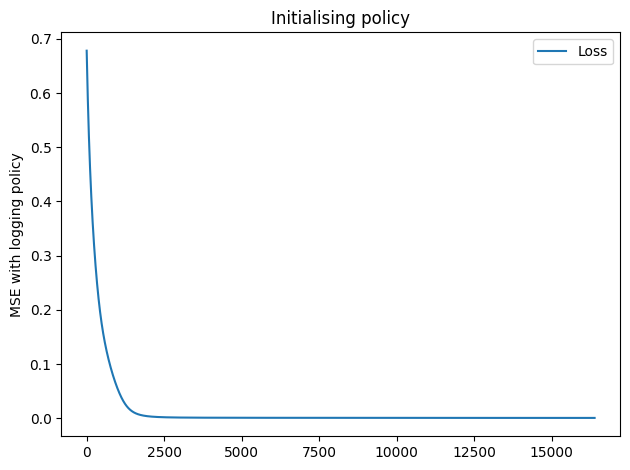

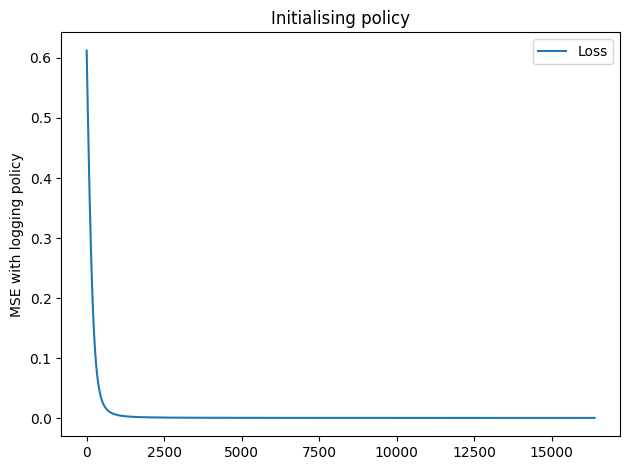

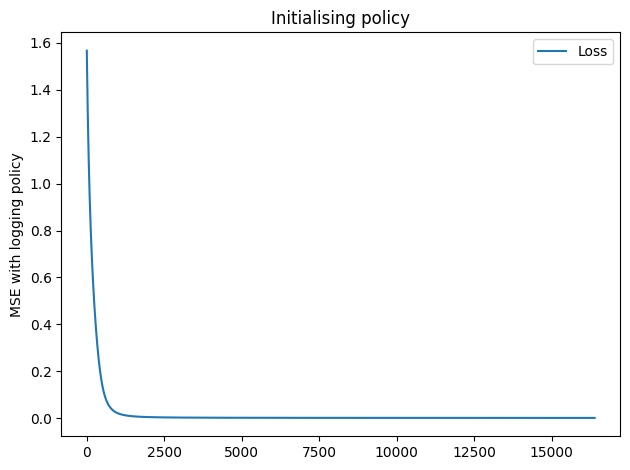

In [14]:
shaded_revenue, shaded_welfare, shaded_surplus = run_repeated_auctions()

In [15]:
def set_truthful_bidders(agent_configs):
    for agent_config in agent_configs:        
        agent_config['bidder'] = {
            'type': 'TruthfulBidder',
            'kwargs': {}
        }
set_truthful_bidders(agent_configs)
truthful_revenue, truthful_welfare, truthful_surplus = run_repeated_auctions()

self.item_values.shape =  (12,)
self.item_values.shape =  (12,)
self.item_values.shape =  (12,)


  0%|          | 0/30 [00:00<?, ?it/s]


 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  33%|████████████████████████████████████████████████████▏                                                                                                           | 5340/16384 [00:01<00:02, 3963.71it/s]


Stopping at Epoch 5340



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  24%|██████████████████████████████████████▋                                                                                                                         | 3964/16384 [00:01<00:03, 3841.21it/s]


Stopping at Epoch 3964



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:  34%|███████████████████████████████████████████████████████                                                                                                         | 5643/16384 [00:01<00:03, 3271.61it/s]


Stopping at Epoch 5643



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:  13%|████████████████████                                                                                                                                            | 2055/16384 [00:00<00:05, 2397.26it/s]


Stopping at Epoch 2055



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:  15%|████████████████████████▎                                                                                                                                       | 2487/16384 [00:00<00:04, 2897.91it/s]


Stopping at Epoch 2487



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   8%|█████████████                                                                                                                                                   | 1337/16384 [00:00<00:05, 2827.31it/s]


Stopping at Epoch 1337



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3184.87it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3475.91it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3226.93it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1029/16384 [00:00<00:04, 3725.06it/s]


Stopping at Epoch 1029



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3184.74it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3171.92it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3770.54it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3708.01it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:05, 2960.26it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3758.83it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3283.54it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3707.56it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3267.22it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:09, 1554.61it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:07, 2056.14it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3226.57it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3286.68it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3689.31it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:05, 2894.51it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3511.71it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3440.64it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3972.98it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3468.71it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3583.81it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3559.99it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3573.08it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3661.46it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4001.53it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3815.95it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3535.54it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3311.67it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3610.83it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   7%|██████████▌                                                                                                                                                     | 1080/16384 [00:00<00:04, 3667.47it/s]


Stopping at Epoch 1080



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3779.15it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:11, 1360.58it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:06, 2392.81it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:07, 1975.96it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:05, 2965.57it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3323.27it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3772.30it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3560.59it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3784.72it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3974.39it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3508.93it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3455.73it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:07, 2111.06it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3584.72it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3524.13it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4150.96it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3407.45it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4123.68it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4269.07it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3775.62it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 3861.24it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4160.34it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3790.03it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3800.04it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:03, 4039.47it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3541.66it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3790.96it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:04, 3592.62it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:08, 1756.13it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|██████████                                                                                                                                                      | 1025/16384 [00:00<00:05, 3017.48it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4041.77it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3453.34it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3732.70it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3930.09it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3448.71it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3685.38it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3961.11it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3585.27it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3626.37it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3983.63it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3450.25it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4031.37it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3266.13it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3847.04it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4025.80it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4073.99it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:04, 3627.57it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3893.71it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 1:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 4098.23it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 2:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3882.82it/s]


Stopping at Epoch 1025



 ... (more hidden) ...
 ... (more hidden) ...
DR 3:   6%|███████                                                                                                         | 1025/16384 [00:00<00:03, 3897.40it/s]

Stopping at Epoch 1025


In [12]:
shaded_welfare

array([0.1478642 , 0.37692871, 0.50646876, 0.50817494, 0.52163981,
       0.50696095, 0.51670985, 0.51897723, 0.52551993, 0.53251483,
       0.52845093, 0.52723358, 0.53206727, 0.53209373, 0.52478447,
       0.53222744, 0.53894868, 0.53817589, 0.52669503, 0.53532998,
       0.53729663, 0.53325079, 0.53556152, 0.52189427, 0.52971396,
       0.518844  , 0.54138688, 0.53782337, 0.526919  , 0.52513151])

In [13]:
max(100 * (truthful_surplus-shaded_surplus)/shaded_surplus), min(100 * (truthful_surplus-shaded_surplus)/shaded_surplus)

(5373.000716755583, -109.90615357976922)

In [14]:
100 * (truthful_welfare[-1]-shaded_welfare[-1])/shaded_welfare[-1]

5.058732755569709

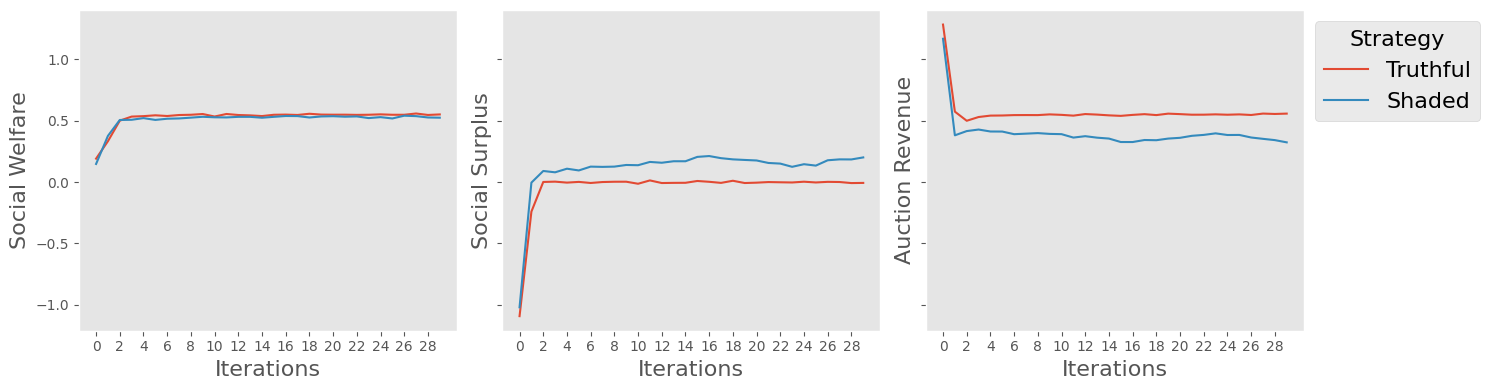

In [16]:
fontsize=16
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,4))
# fig.grid()
plt.style.use("ggplot")
plt.grid()
axes[0].plot(truthful_welfare, label=f'Truthful')
axes[1].plot(truthful_surplus, label=f'Truthful')
axes[2].plot(truthful_revenue, label=f'Truthful')

axes[0].plot(shaded_welfare, label=f'Shaded')
axes[1].plot(shaded_surplus, label=f'Shaded')
axes[2].plot(shaded_revenue, label=f'Shaded')
plt.style.use("ggplot")
plt.grid()

# axes[1].set_title('Effects of Bid-Shading in First-Price Auctions with Oracle bidders', fontsize=fontsize+4)
for i in range(3):

    axes[i].set_xlabel('Iterations', fontsize=fontsize)
    axes[i].set_xticks(list(range(0,len(truthful_revenue),2)))
    axes[i].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    axes[i].grid()
    
axes[0].set_ylabel('Social Welfare', fontsize=fontsize)
axes[1].set_ylabel('Social Surplus', fontsize=fontsize)
axes[2].set_ylabel('Auction Revenue', fontsize=fontsize)
plt.style.use("ggplot")
plt.grid()

legend = axes[2].legend(loc='upper left',
                        bbox_to_anchor=(1.0, 1.0),
                        fontsize=fontsize)
legend.set_title('Strategy', prop={'size': fontsize})
plt.grid()

fig.tight_layout()
plt.show()

The leftmost plot shows social welfare (the sum of generated welfare over all participants in the auction).
Whether participants shade their bids (or not) does not have affect welfare: indeed, the value that is generated by the ads that are shown remains unchanged.

The middle plot shows social surplus.
Bidding truthfully in a first-price auction gives an expected surplus of 0.
As bidders start to shade their bids, we can see that bidders succesfully generate surplus.

The rightmost plot shows revenue for the auctioneer.
When bidders bid truthfully, the monetary value for all generated welfare goes to the auctioneer.
As bidders start to shade their bids, we can see that revenue diminishes as surplus increases.

In [61]:
class OracleAllocator:
    def __init__(self, rng, **kwargs):
        print(rng, kwargs)
        pass

class PyTorchLogisticRegressionAllocator:
    pass

In [62]:
from enum import Enum, auto
# from src.ad_allocation.bidder_allocation import PyTorchLogisticRegressionAllocator, OracleAllocator

class AdAllocationEnum(Enum):
    ORACLE_BIDDER_ALLOCATOR = auto()
    PYTORCH_LOGISTIC_REGRESSION_ALLOCATOR = auto()

In [63]:
AdAllocationEnum["ORACLE_BIDDER_ALLOCATOR"]

<AdAllocationEnum.ORACLE_BIDDER_ALLOCATOR: 1>

In [64]:
AdAllocationEnum["ORACLE_BIDDER_ALLOCATOR"]: 2

In [65]:
OracleAllocator(3, c=3232, d=12, e=12, k=12)

3 {'c': 3232, 'd': 12, 'e': 12, 'k': 12}
